#### Project Overview

###### Question
Do different product Categories have different average Profit?

###### Null (H₀)
Mean profit is equal across categories.

###### Alternative (H₁)
At least one category has a different mean profit

###### Import dependencies

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.anova import anova_lm
import warnings
warnings.filterwarnings("ignore")

###### Loading dataset

In [4]:
data = pd.read_csv("Sample - Superstore.csv", encoding = "latin1")

In [5]:
# creating a copy
df = data.copy()

In [6]:
# view head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

###### Using oneway-Anova

In [8]:
# creating a dataset for anova
df_anova = df[['Category','Profit']].dropna().copy()

In [9]:
#checking df_anova information
df_anova.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  9994 non-null   object 
 1   Profit    9994 non-null   float64
dtypes: float64(1), object(1)
memory usage: 156.3+ KB


###### Exploratory Data Analysis (EDA)

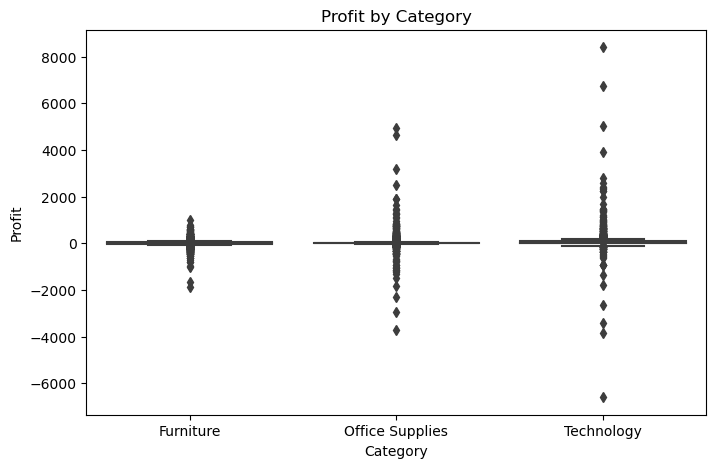

In [10]:
#Checking outliers
plt.figure(figsize=(8,5))
sns.boxplot(x='Category', y='Profit', data=df_anova)
plt.title('Profit by Category')
plt.show()

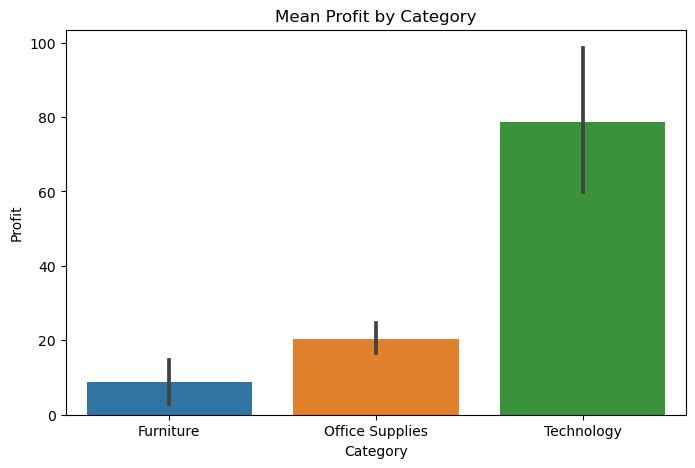

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Profit', data=df_anova, ci=95)
plt.title('Mean Profit by Category')
plt.show()


In [15]:
#aggregate information
print(df_anova.groupby('Category')['Profit'].agg(['count','mean','std']).round(2))

                 count   mean     std
Category                             
Furniture         2121   8.70  136.05
Office Supplies   6026  20.33  164.89
Technology        1847  78.75  428.82


###### Interpretation

* Technology has the highest mean profit (≈ 78.75) and also the highest variability (std ≈ 428.82).

* Office Supplies has a moderate mean profit (20.33).

* Furniture has the lowest mean profit (8.70).

The standard deviations are very large relative to the means, profits vary widely inside each category

###### Anova model

In [16]:
model = smf.ols('Profit ~ C(Category)', data=df_anova).fit()
anova_table = anova_lm(model, typ=2)
print("ANOVA table:\n", anova_table)

ANOVA table:
                    sum_sq      df          F        PR(>F)
C(Category)  5.898009e+06     2.0  54.311023  3.469918e-24
Residual     5.424958e+08  9991.0        NaN           NaN


###### Interpretation

F = 54.31 - Very high F-statistic.

p = 3.47 × 10⁻²⁴ (essentially 0) - extremely significant.

Conclusion

* There is a statistically significant difference in mean profit across the 3 product categories.

###### Assumption

In [17]:
groups = [g['Profit'].values for n,g in df_anova.groupby('Category')]
levene_stat, levene_p = stats.levene(*groups, center='median')
print('Levene p:', levene_p)

Levene p: 2.8085330840251473e-36


###### Interpretation

p < 0.05 - Variances are NOT equal across categories.

This violates a key ANOVA assumption.

Conclusion

* I will use Welch ANOVA and Games–Howell post-hoc (not Tukey)

######  Welch Anova (Since Variance are unequal)

In [20]:
import pingouin as pg

welch = pg.welch_anova(dv='Profit', between='Category', data=df_anova)
print(welch)

     Source  ddof1        ddof2          F         p-unc       np2
0  Category      2  3587.089566  24.082535  4.080218e-11  0.010755


###### Interpretation

F = 24.08 - There is a strong difference between mean profits across categories.

p = 4.08 × 10⁻¹¹ - Highly statistically significant.

* np² (effect size) = 0.0107 - This is a small effect, meaning:
* Profit differences exist, but category explains only about 1% of profit variation.
(The rest comes from other business factors.)

###### Games-Howell Post Hoc test

In [21]:
posthoc = pg.pairwise_gameshowell(dv='Profit', between='Category', data=df_anova)
posthoc

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Furniture,Office Supplies,8.699327,20.327050,-11.627722,3.638473,-3.195770,4459.347317,4.011702e-03,-0.073638
1,Furniture,Technology,8.699327,78.752002,-70.052675,10.405997,-6.731952,2169.291419,6.470080e-11,-0.226661
2,Office Supplies,Technology,20.327050,78.752002,-58.424953,10.201460,-5.727117,2015.836025,3.522238e-08,-0.231035


###### Interpretation

Furniture vs Office Supplies

Difference = –11.63

p = 0.004 (significant)

* Office Supplies profits are significantly higher than Furniture, but the gap is moderate.

Furniture vs Technology

Difference = –70.05

p = 6.47e-11 (very significant)

* Technology profits are drastically higher than Furniture.

Office Supplies vs Technology

Difference = –58.42

p = 3.52e-08 (very significant)

* Technology profits are significantly higher than Office Supplies.




###### Final Interpretation (Business Summary)

* Profitability differs significantly across the 3 product categories.

* Technology is the most profitable, by a very large margin.

* Office Supplies ranks second, moderately profitable.

* Furniture is the least profitable category.

* The effect size is small, meaning category matters statistically, but many other factors also influence profit.